### 1. Write a Python program to count the number of digits in any given integer number. [5] 

In [8]:
def count_digits(n):
    # Convert the number to string and count the digits 
    return len(str(abs(n)))

# Test the function
print("Q1: Number of digits in 123456 is:", count_digits(123456))

Q1: Number of digits in 123456 is: 6


### 2. A Palindrome is a string that reads the same backwards and forwards. Write a Python program to determine whether or not a given string is a Palindrome. [10] 

In [10]:
def is_palindrome(s):
    # Remove spaces, convert to lowercase and check if string equals its reverse
    s = str(s).lower().replace(" ", "")
    return s == s[::-1]

# Test the function
print("Q2: 'madam' is a palindrome:", is_palindrome("madam"))


Q2: 'madam' is a palindrome: True


### 3. Read the dataset into a Pandas dataframe called 'loans' and clean it as necessary. [5] 

In [20]:
import pandas as pd  

# Load Excel file into a DataFrame
loans = pd.read_excel(r"C:\Users\Nothando\Downloads\Loans Data.xlsx")

# Show the first few rows of data
print("Q3: First few rows of the dataset:")
print(loans.head())

# Drop rows with any missing values
loans.dropna(inplace=True)


Q3: First few rows of the dataset:
  Age  Marital Status Income  Gender  Loan Category
0  44               1  48400     0.0            1.0
1  33               1      b     0.0            NaN
2  52               1  57200     1.0            3.0
3  jj               0  36300     1.0            1.0
4  30               1  33000     0.0            3.0


### 4. Analyse the data and display the average age of the clients in the dataset? [5]

In [25]:
# Convert 'Age' column to numeric values, set errors='coerce' to turn invalid strings into NaN
loans['Age'] = pd.to_numeric(loans['Age'], errors='coerce')

# Drop rows where Age is NaN 
loans = loans.dropna(subset=['Age'])

# Now calculate the average
average_age = loans['Age'].mean()
print("Q4: Average age of clients:", round(average_age, 2))


Q4: Average age of clients: 41.69


### 5. Display the gender that is more dominant than the other in the dataset? [5] 

In [28]:
# Count frequency of gender values
dominant_gender = loans['Gender'].value_counts().idxmax()
print("Q5: Most dominant gender:", dominant_gender)


Q5: Most dominant gender: 1.0


### 6. Display the number of clients who are married? [5] 

In [31]:
married_count = loans[loans['Marital Status'] == 'Married'].shape[0]
print("Q6: Number of married clients:", married_count)


Q6: Number of married clients: 0


### 7. Display the age and gender of the client with the highest income? [5] 

In [33]:
loans['Income'] = pd.to_numeric(loans['Income'], errors='coerce')
loans.dropna(subset=['Income'], inplace=True)

# Find row with highest income
highest_income_row = loans.loc[loans['Income'].idxmax()]
print(f"Q7: Age: {highest_income_row['Age']}, Gender: {highest_income_row['Gender']}")


Q7: Age: 77.0, Gender: 1.0


### 8. Use Linear Regression to predict the loan category of a client based on their income. Use 75% as training data and 25% as testing data. Show all steps clearly and include comments. [15] 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Convert Loan Category to numeric codes
loans['Loan Category'] = loans['Loan Category'].astype('category').cat.codes

# Define X and y
X = loans[['Income']]
y = loans['Loan Category']

# Train-test split (75%/25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Fit linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict using training data
y_train_pred = model.predict(X_train)
print("Q8: Linear Regression model trained using Income.")


Q8: Linear Regression model trained using Income.


### 9. Plot the regression graph for the traininng data vs the predicted values to indicate clients' loan category relative to income. Label all axes and give an appropriate title to your graph. [10] 

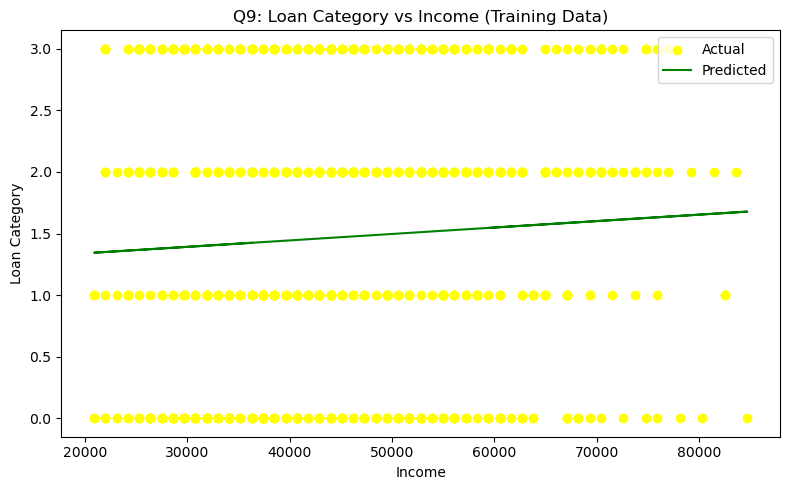

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(X_train, y_train, color='yellow', label='Actual')
plt.plot(X_train, y_train_pred, color='green', label='Predicted')
plt.title("Q9: Loan Category vs Income (Training Data)")
plt.xlabel("Income")
plt.ylabel("Loan Category")
plt.legend()
plt.tight_layout()
plt.show()


### 10. Calculate and display the coefficient of determination (r- squared value) to evaluate the efficieency of the model. [5]

In [43]:
from sklearn.metrics import r2_score

r2 = r2_score(y_train, y_train_pred)
print("Q10: R-squared (Income only):", round(r2, 4))


Q10: R-squared (Income only): 0.0042


### 11. Use Linear Regression to predict the loan category of a client given their age, gender, marital status and income. Training data = 75% and testing data = 25%. Show all steps and comment each step. [15] 

In [46]:
# Encode categorical columns
loans['Gender'] = loans['Gender'].astype('category').cat.codes
loans['Marital Status'] = loans['Marital Status'].astype('category').cat.codes

# Features and target
X_multi = loans[['Age', 'Gender', 'Marital Status', 'Income']]
y_multi = loans['Loan Category']

# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.25, random_state=42)

# Train model
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)

# Predict
y_train_pred_m = model_multi.predict(X_train_m)
y_test_pred_m = model_multi.predict(X_test_m)
print("Q11: Multi-feature model trained.")


Q11: Multi-feature model trained.


### 12. Use the testing and training data to evaluate the efficacy of the model in predicting loan categories? [5] 

In [49]:
r2_train = r2_score(y_train_m, y_train_pred_m)
r2_test = r2_score(y_test_m, y_test_pred_m)

print("Q12: R² - Training data:", round(r2_train, 4))
print("Q12: R² - Testing data:", round(r2_test, 4))


Q12: R² - Training data: 0.0095
Q12: R² - Testing data: 0.0117


### 13. Plot two 'distribution plots', one for the training data vs predicted values and the other for the testing data vs predicted values. [10] 

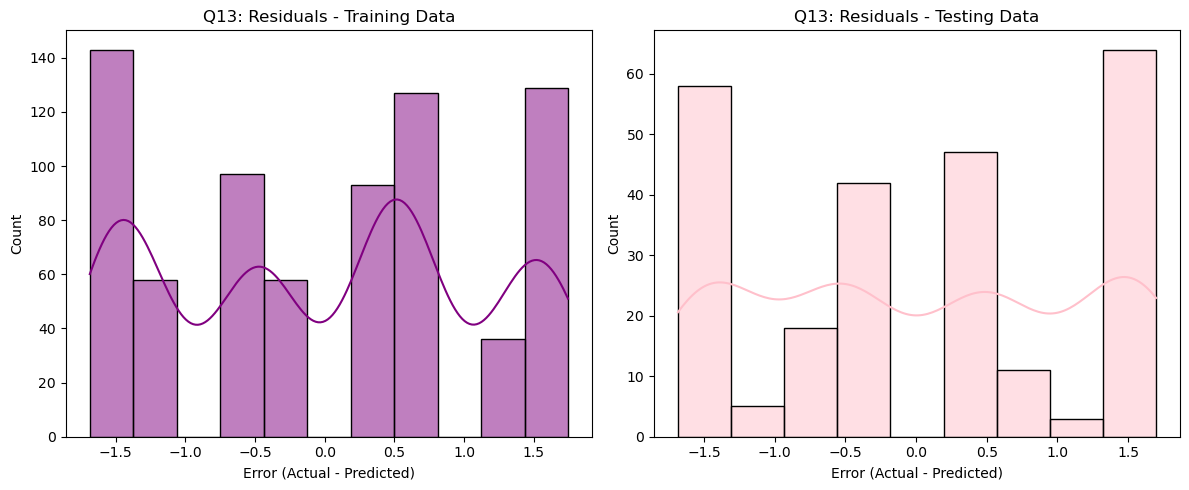

In [54]:
import seaborn as sns

plt.figure(figsize=(12, 5))

# Plot 1: Training residuals
plt.subplot(1, 2, 1)
sns.histplot(y_train_m - y_train_pred_m, kde=True, color='purple')
plt.title("Q13: Residuals - Training Data")
plt.xlabel("Error (Actual - Predicted)")

# Plot 2: Testing residuals
plt.subplot(1, 2, 2)
sns.histplot(y_test_m - y_test_pred_m, kde=True, color='pink')
plt.title("Q13: Residuals - Testing Data")
plt.xlabel("Error (Actual - Predicted)")

plt.tight_layout()
plt.show()
